### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics
import matplotlib
import seaborn as sns
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_squared_error, mean_absolute_error
import joblib

### Data importing

In [2]:
df=pd.read_csv('CE802_P3_Data.csv') 
df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,6.57,2,1.42,119.73,-3.34,Low,7.83,-4506.63,-16448.13,-214.64,6.96,-29.12,6,USA,3835.29,660.06,288.54
1,17.64,2,0.70,102.48,-9.77,High,2.43,-3326.25,-15865.93,-199.36,9.20,-30.42,4,UK,4130.94,683.22,1075.23
2,6.06,1,14.72,249.60,-2.26,Very high,4.29,-2206.02,-11705.56,-149.86,12.97,-21.58,16,USA,5305.89,769.83,1722.09
3,2.07,3,0.00,149.85,-0.99,High,3.50,-2798.73,-13815.70,-219.50,5.78,-38.10,10,Europe,2149.47,720.63,3376.78
4,18.99,5,1.92,26.67,-5.62,Low,3.10,-4357.92,-18105.59,-208.86,7.38,-7.06,6,Europe,5115.03,789.96,0.00


### Separating  the dependent and independent variables

In [3]:
X=df.drop(['Target'],axis=1)
y=df['Target']

### Feature encoding

In [4]:
encoding = {"F14":     {"Europe": 0, "UK": 1,"Rest": 2, "USA":3},
                "F6": {"Low": 0, "High": 1, "Very high": 2, "Medium":3, "Very low": 4}     
               }
df_encoded=X.replace(encoding)

### Separating categorical variable 

In [5]:
cat_var1=df_encoded['F6']
cat_var2=df_encoded['F14']
cat_vars=pd.concat([cat_var1, cat_var2], axis=1)
df_encoded=df_encoded.drop(['F14','F6'],axis=1)

In [6]:
df_encoded

,F1,F2,F3,F4,F5,F7,F8,F9,F10,F11,F12,F13,F15,F16
0,6.57,2,1.42,119.73,-3.34,7.83,-4506.63,-16448.13,-214.64,6.96,-29.12,6,3835.29,660.06
1,17.64,2,0.70,102.48,-9.77,2.43,-3326.25,-15865.93,-199.36,9.20,-30.42,4,4130.94,683.22
2,6.06,1,14.72,249.60,-2.26,4.29,-2206.02,-11705.56,-149.86,12.97,-21.58,16,5305.89,769.83
3,2.07,3,0.00,149.85,-0.99,3.50,-2798.73,-13815.70,-219.50,5.78,-38.10,10,2149.47,720.63
4,18.99,5,1.92,26.67,-5.62,3.10,-4357.92,-18105.59,-208.86,7.38,-7.06,6,5115.03,789.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,12.33,9,2.64,206.46,-3.44,6.73,-2566.77,-23124.56,-140.32,9.82,-38.42,8,3759.72,722.07
1496,0.96,3,48.70,91.20,-3.68,3.46,-3142.26,-17738.33,-121.30,11.10,-31.12,8,5409.42,987.69
1497,7.89,3,57.82,-65.46,-1.72,2.63,-1500.72,-15052.66,-253.74,6.19,-15.24,6,4109.13,688.32
1498,3.75,5,59.36,78.69,-3.43,2.28,-4507.05,-14998.52,-214.40,7.31,-28.96,8,4671.33,561.90


###  Exploratory Data Analysis (EDA) 

1. Checking about null values

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1500 non-null   float64
 1   F2      1500 non-null   int64  
 2   F3      1500 non-null   float64
 3   F4      1500 non-null   float64
 4   F5      1500 non-null   float64
 5   F6      1500 non-null   object 
 6   F7      1500 non-null   float64
 7   F8      1500 non-null   float64
 8   F9      1500 non-null   float64
 9   F10     1500 non-null   float64
 10  F11     1500 non-null   float64
 11  F12     1500 non-null   float64
 12  F13     1500 non-null   int64  
 13  F14     1500 non-null   object 
 14  F15     1500 non-null   float64
 15  F16     1500 non-null   float64
dtypes: float64(12), int64(2), object(2)
memory usage: 187.6+ KB


2. Histogram to analyze the range of values in each feature

array([[<AxesSubplot:title={'center':'F1'}>,
        <AxesSubplot:title={'center':'F2'}>,
        <AxesSubplot:title={'center':'F3'}>,
        <AxesSubplot:title={'center':'F4'}>],
       [<AxesSubplot:title={'center':'F5'}>,
        <AxesSubplot:title={'center':'F7'}>,
        <AxesSubplot:title={'center':'F8'}>,
        <AxesSubplot:title={'center':'F9'}>],
       [<AxesSubplot:title={'center':'F10'}>,
        <AxesSubplot:title={'center':'F11'}>,
        <AxesSubplot:title={'center':'F12'}>,
        <AxesSubplot:title={'center':'F13'}>],
       [<AxesSubplot:title={'center':'F15'}>,
        <AxesSubplot:title={'center':'F16'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

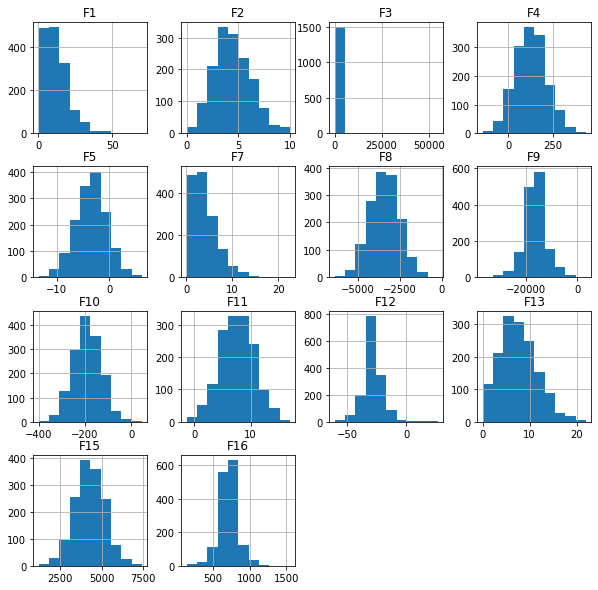

In [8]:
X.hist(figsize=[10,10])

4. Checking values in 5th Feature

In [9]:
print(X['F5'].value_counts())

-3.96    7
-4.17    7
-3.91    6
-3.09    6
-4.20    6
        ..
-4.05    1
-8.97    1
-0.03    1
 1.16    1
-0.95    1
Name: F5, Length: 833, dtype: int64


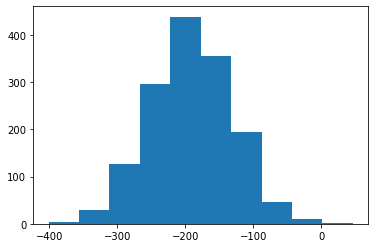

In [10]:
plt.hist(X.F10.values)
plt.show()

In [11]:
X.describe()

,F1,F2,F3,F4,F5,F7,F8,F9,F10,F11,F12,F13,F15,F16
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000,1500.000000
mean,12.124980,3.942667,127.205547,125.717880,-3.434847,4.054593,-3403.165560,-16366.748340,-190.716067,7.622873,-28.233333,7.894667,4273.34566,709.839400
std,8.681726,1.810036,1548.308592,87.920436,3.040026,2.906426,889.404292,4443.035539,59.715228,3.024250,8.366284,3.673405,904.26205,126.724179
min,0.120000,0.000000,0.000000,-143.340000,-13.500000,0.040000,-6385.500000,-36720.260000,-401.160000,-1.400000,-60.740000,0.000000,1195.20000,138.330000
25%,5.835000,3.000000,0.260000,66.780000,-5.390000,1.907500,-4011.052500,-18602.940000,-232.450000,5.500000,-32.190000,6.000000,3670.80000,646.620000
50%,10.245000,4.000000,2.020000,123.300000,-3.330000,3.370000,-3411.645000,-16367.805000,-190.810000,7.620000,-28.270000,8.000000,4262.59500,710.025000
75%,16.477500,5.000000,13.610000,183.810000,-1.455000,5.472500,-2788.147500,-14322.330000,-150.620000,9.740000,-24.450000,10.000000,4900.56750,769.837500
max,70.170000,10.000000,54949.060000,433.080000,6.270000,22.570000,-210.480000,3394.970000,46.720000,17.050000,27.000000,22.000000,7425.99000,1552.740000


### Find outliers

1. Finding Percentile (25% and 75%)

In [12]:
q1 = df_encoded.quantile(0.25)
q3 = df_encoded.quantile(0.75)
percentile =pd.DataFrame([q1,q3])
percentile

,F1,F2,F3,F4,F5,F7,F8,F9,F10,F11,F12,F13,F15,F16
0.25,5.8350,3.0,0.26,66.78,-5.390,1.9075,-4011.0525,-18602.94,-232.45,5.50,-32.19,6.0,3670.8000,646.6200
0.75,16.4775,5.0,13.61,183.81,-1.455,5.4725,-2788.1475,-14322.33,-150.62,9.74,-24.45,10.0,4900.5675,769.8375


2. Finding interquartile range

In [13]:
iqr = q3 - q1
iqr_df=pd.DataFrame([iqr])
iqr_df

,F1,F2,F3,F4,F5,F7,F8,F9,F10,F11,F12,F13,F15,F16
0,10.6425,2.0,13.35,117.03,3.935,3.565,1222.905,4280.61,81.83,4.24,7.74,4.0,1229.7675,123.2175


3. Finding the lower limit and upper limit

In [14]:
lower_lim = q1 - 1.5 * iqr
upper_lim = q3 + 1.5 * iqr

4. Found the lower value and upper value for outlier for each column

In [15]:
lower=pd.DataFrame(lower_lim)
upper=pd.DataFrame(upper_lim)
lower_up = lower.rename(columns = {0:'lower limit'})
upper_up = upper.rename(columns = {0:'upper limit'})
lower_limit_df=lower_up.T
upper_limit_df=upper_up.T
#df_mix_max_limit=lower.append(upper)
df_up=pd.concat([lower_limit_df, upper_limit_df])
df_up

,F1,F2,F3,F4,F5,F7,F8,F9,F10,F11,F12,F13,F15,F16
lower limit,-10.12875,0.0,-19.765,-108.765,-11.2925,-3.44,-5845.41,-25023.855,-355.195,-0.86,-43.80,0.0,1826.14875,461.79375
upper limit,32.44125,8.0,33.635,359.355,4.4475,10.82,-953.79,-7901.415,-27.875,16.10,-12.84,16.0,6745.21875,954.66375


### Removing the outlier values 

In [16]:
df_without_outlier = df_encoded[(df_encoded>lower_lim)&(df_encoded<upper_lim)]
df_without_outlier

,F1,F2,F3,F4,F5,F7,F8,F9,F10,F11,F12,F13,F15,F16
0,6.57,2.0,1.42,119.73,-3.34,7.83,-4506.63,-16448.13,-214.64,6.96,-29.12,6.0,3835.29,660.06
1,17.64,2.0,0.70,102.48,-9.77,2.43,-3326.25,-15865.93,-199.36,9.20,-30.42,4.0,4130.94,683.22
2,6.06,1.0,14.72,249.60,-2.26,4.29,-2206.02,-11705.56,-149.86,12.97,-21.58,NaN,5305.89,769.83
3,2.07,3.0,0.00,149.85,-0.99,3.50,-2798.73,-13815.70,-219.50,5.78,-38.10,10.0,2149.47,720.63
4,18.99,5.0,1.92,26.67,-5.62,3.10,-4357.92,-18105.59,-208.86,7.38,NaN,6.0,5115.03,789.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,12.33,NaN,2.64,206.46,-3.44,6.73,-2566.77,-23124.56,-140.32,9.82,-38.42,8.0,3759.72,722.07
1496,0.96,3.0,NaN,91.20,-3.68,3.46,-3142.26,-17738.33,-121.30,11.10,-31.12,8.0,5409.42,NaN
1497,7.89,3.0,NaN,-65.46,-1.72,2.63,-1500.72,-15052.66,-253.74,6.19,-15.24,6.0,4109.13,688.32
1498,3.75,5.0,NaN,78.69,-3.43,2.28,-4507.05,-14998.52,-214.40,7.31,-28.96,8.0,4671.33,561.90


The values now contains the Nan values after removing the outliers.


In [17]:
df_without_outlier.isnull().sum()

F1      44
F2      64
F3     261
F4      13
F5      18
F7      49
F8      10
F9     105
F10     10
F11      3
F12    111
F13     72
F15     11
F16     95
dtype: int64

now we instead of removing these rows we can replace these value with mean of their column. 

In [18]:
df_final=df_without_outlier.fillna(df_without_outlier.mean())
df_final

,F1,F2,F3,F4,F5,F7,F8,F9,F10,F11,F12,F13,F15,F16
0,6.57,2.000000,1.420000,119.73,-3.34,7.83,-4506.63,-16448.13,-214.64,6.96,-29.120000,6.000000,3835.29,660.060000
1,17.64,2.000000,0.700000,102.48,-9.77,2.43,-3326.25,-15865.93,-199.36,9.20,-30.420000,4.000000,4130.94,683.220000
2,6.06,1.000000,14.720000,249.60,-2.26,4.29,-2206.02,-11705.56,-149.86,12.97,-21.580000,7.705882,5305.89,769.830000
3,2.07,3.000000,0.000000,149.85,-0.99,3.50,-2798.73,-13815.70,-219.50,5.78,-38.100000,10.000000,2149.47,720.630000
4,18.99,5.000000,1.920000,26.67,-5.62,3.10,-4357.92,-18105.59,-208.86,7.38,-28.333319,6.000000,5115.03,789.960000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,12.33,3.844708,2.640000,206.46,-3.44,6.73,-2566.77,-23124.56,-140.32,9.82,-38.420000,8.000000,3759.72,722.070000
1496,0.96,3.000000,3.901889,91.20,-3.68,3.46,-3142.26,-17738.33,-121.30,11.10,-31.120000,8.000000,5409.42,707.973246
1497,7.89,3.000000,3.901889,-65.46,-1.72,2.63,-1500.72,-15052.66,-253.74,6.19,-15.240000,6.000000,4109.13,688.320000
1498,3.75,5.000000,3.901889,78.69,-3.43,2.28,-4507.05,-14998.52,-214.40,7.31,-28.960000,8.000000,4671.33,561.900000


### Feature scaling (Continuous variables)

In [19]:
import pandas as pd
from sklearn import preprocessing

x1 = df_encoded.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x1)
df_scaled = pd.DataFrame(x_scaled)
df_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.092077,0.2,0.000026,0.456386,0.513910,0.345761,0.304269,0.505347,0.416451,0.453117,0.360383,0.272727,0.423717,0.368868
1,0.250107,0.2,0.000013,0.426460,0.188670,0.106081,0.495423,0.519861,0.450567,0.574526,0.345566,0.181818,0.471167,0.385242
2,0.084797,0.1,0.000268,0.681690,0.568538,0.188637,0.676837,0.623571,0.561088,0.778862,0.446319,0.727273,0.659738,0.446476
3,0.027837,0.3,0.000000,0.508640,0.632777,0.153573,0.580852,0.570969,0.405600,0.389160,0.258035,0.454545,0.153154,0.411691
4,0.269379,0.5,0.000035,0.294941,0.398584,0.135819,0.328352,0.464030,0.429356,0.475881,0.611808,0.272727,0.629106,0.460708


### Combining variables after scaling of continuous variables

In [20]:
df_scaled_final = pd.concat([cat_vars, df_scaled], axis=1)

### Splitting

In [21]:
X_train, X_test, y_train, y_test = train_test_split(df_scaled_final.values, y, train_size=0.8,random_state=42)

In [22]:
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor(random_state=1, max_iter=50).fit(X_train, y_train)

In [24]:
pred_regr=regr.predict(X_test)

In [25]:
print("Mean squared error: ",mean_squared_error(y_test,pred_regr))

Mean squared error:  1931456.2128295808


### Linear regression

In [22]:
lr1 = LinearRegression()
lr1=lr1.fit(X_train, y_train)
lr_pred1=lr1.predict(X_test)
print("Mean squared error: ",mean_squared_error(y_test,lr_pred1))

Mean squared error:  282029.7842816614


In [23]:
lr1.intercept_

-1109.5905062212864

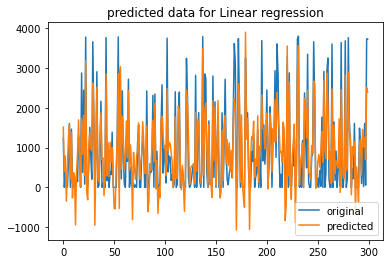

In [24]:
ax_lab = range(len(y_test))
plt.plot(ax_lab, y_test, label="original")
plt.plot(ax_lab, lr_pred1, label="predicted")
plt.title("predicted data for Linear regression")
plt.legend()
plt.show()

In [25]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=10)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [26]:
print(ridge_regressor.best_params_)
ypred_rid = ridge_regressor.predict(X_test)
mse_rod = mean_squared_error(y_test, ypred_rid)
mse_rod

{'alpha': 0.01}


282090.22521037754

### Ridge

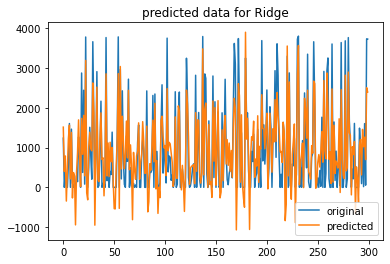

In [27]:
ax_lab = range(len(y_test))
plt.plot(ax_lab, y_test, label="original")
plt.plot(ax_lab, ypred_rid, label="predicted")
plt.title("predicted data for Ridge")
plt.legend()
plt.show()

### Lasso regression

In [28]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=10)
lasso_regressor.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [29]:
print(lasso_regressor.best_params_)
ypred_lasso = lasso_regressor.predict(X_test)
mse_lasso = mean_squared_error(y_test, ypred_lasso)
mse_lasso

{'alpha': 1}


284173.98087079724

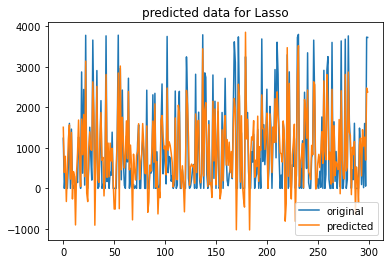

In [30]:
ax_lab = range(len(y_test))
plt.plot(ax_lab, y_test, label="original")
plt.plot(ax_lab, ypred_lasso, label="predicted")
plt.title("predicted data for Lasso")
plt.legend()
plt.show()

### Importing test data and drop the label

In [31]:
df_test=pd.read_csv('CE802_P3_Test.csv') 
data=df_test.drop(['Target'],axis=1)

In [32]:
data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16
0,19.62,4,64.06,43.65,-3.45,Very high,6.51,-3379.32,-10702.17,-252.84,6.16,-28.80,10,Rest,2833.83,630.81
1,8.91,3,0.00,-29.13,-5.45,Low,2.72,-4726.20,-18639.21,-182.04,4.12,-37.92,6,Europe,5011.47,623.01
2,8.55,2,0.94,175.35,-4.77,High,1.91,-2800.83,-20690.94,-262.80,3.76,-26.42,6,UK,3835.32,684.15
3,26.73,3,1.86,163.71,-6.74,Low,3.20,-4202.19,-14001.97,-258.80,4.53,-24.74,10,UK,2372.91,777.60
4,5.52,5,6.74,298.77,-8.34,Low,2.77,-3333.69,-14949.07,-275.84,6.24,-31.00,2,Rest,5324.61,724.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,6.84,3,6.76,178.83,-4.45,High,4.82,-2487.90,-14300.95,-248.86,3.97,-32.06,8,USA,4696.83,579.36
1496,14.67,4,217.94,136.71,-2.16,Low,5.24,-3589.92,-17406.68,-217.44,10.18,-30.12,6,USA,3952.08,747.75
1497,12.96,4,18.88,210.78,1.85,Very low,0.60,-3147.93,-14315.11,-199.28,9.19,-23.96,8,Europe,4269.81,794.01
1498,14.22,7,0.68,177.42,-3.61,Very low,1.39,-3273.96,-10592.68,-139.00,8.26,-21.26,0,UK,4401.87,772.29


### Feature encoding

In [33]:
encoding1 = {"F14":     {"Europe": 0, "UK": 1,"Rest": 2, "USA":3},
                "F6": {"Low": 0, "High": 1, "Very high": 2, "Medium":3, "Very low": 4}     
               }
data=data.replace(encoding1)

### Separating categorical variable 

In [34]:
cat_var1_test=data['F6']
cat_var2_test=data['F14']
cat_vars_test=pd.concat([cat_var1_test, cat_var2_test], axis=1)
df_encoded_test=data.drop(['F14','F6'],axis=1)

### Feature scaling for test data and combining the countinuous variable

In [35]:
x2 = df_encoded_test.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled_test = min_max_scaler.fit_transform(x2)
x_scaled_test = pd.DataFrame(x_scaled_test)
df_scaled_final_test = pd.concat([cat_vars_test, x_scaled_test], axis=1)

### Saving the trained model on full data and then saving the model into disk

In [36]:
lin_reg = lasso.fit(df_scaled_final.values, y)
model_lin1 = 'lin_reg.sav'
joblib.dump(lin_reg, model_lin1)

['lin_reg.sav']

In [37]:
df_scaled_final_test.head()

,F6,F14,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,2,2,0.361915,0.4,0.000884,0.345815,0.473381,0.366438,0.478181,0.690453,0.308492,0.445405,0.466474,0.454545,0.232946,0.452186
1,0,0,0.163140,0.3,0.000000,0.230242,0.377458,0.150114,0.257126,0.513320,0.500217,0.335135,0.372103,0.272727,0.566754,0.445672
2,1,1,0.156459,0.2,0.000013,0.554952,0.410072,0.103881,0.573124,0.467531,0.281521,0.315676,0.491101,0.272727,0.386463,0.496731
3,0,1,0.493875,0.3,0.000026,0.536468,0.315588,0.177511,0.343128,0.616810,0.292353,0.357297,0.508485,0.454545,0.162292,0.574771
4,0,2,0.100223,0.5,0.000093,0.750941,0.238849,0.152968,0.485670,0.595674,0.246209,0.449730,0.443709,0.090909,0.614755,0.530377


In [38]:
df_scaled_final.head()

,F6,F14,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0,3,0.092077,0.2,0.000026,0.456386,0.513910,0.345761,0.304269,0.505347,0.416451,0.453117,0.360383,0.272727,0.423717,0.368868
1,1,1,0.250107,0.2,0.000013,0.426460,0.188670,0.106081,0.495423,0.519861,0.450567,0.574526,0.345566,0.181818,0.471167,0.385242
2,2,3,0.084797,0.1,0.000268,0.681690,0.568538,0.188637,0.676837,0.623571,0.561088,0.778862,0.446319,0.727273,0.659738,0.446476
3,1,0,0.027837,0.3,0.000000,0.508640,0.632777,0.153573,0.580852,0.570969,0.405600,0.389160,0.258035,0.454545,0.153154,0.411691
4,0,0,0.269379,0.5,0.000035,0.294941,0.398584,0.135819,0.328352,0.464030,0.429356,0.475881,0.611808,0.272727,0.629106,0.460708


### Loading the model from disk and getting predictions

In [39]:
pred_lin = lin_reg.predict(df_scaled_final_test)
mse_final = mean_squared_error(y, pred_lin)
print(mse_final)

2339231.47395927


### Customer expense prediction for next month

In [40]:
lin_reg.predict(df_scaled_final_test.values).mean()

1242.0351492264872

### Converting predicted labels into dataframe and combining with test data

In [41]:
pred_final_lin=lin_reg.predict(df_scaled_final_test.values)
dataframe_final_test=pd.DataFrame(pred_final_lin, columns=['Target']) 

### Converting dataframe  into required CSV format

In [42]:
predicted_data=pd.concat([df_test, dataframe_final_test], axis=1)
predicted_data.to_csv('CE802_P3_Test.csv', sep=',', index=False,header=True)